PACKAGES AND DEPENDENCIES

In [96]:
!pip install tensorflow opencv-python matplotlib

In [97]:
import os
import tensorflow as tf

In [98]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Configure GPU to run without using full VRAM

In [99]:
import cv2
import imghdr
from matplotlib import pyplot as plt

# Import OpenCV and IMGHDR, which checks image type of input


Data Loading


In [100]:
data_dir = 'data'

In [101]:
os.listdir(os.path.join(data_dir, 't_shirt'))

['029032_55_basict_f1_700x700.png',
 '1-1.png',
 '10236558_11.jpg',
 '13-5.jpg',
 '1410760800_1_1_16.jpg',
 '19-2.jpg',
 '1_hero-image.jpg',
 '2-58ee7a7323cd6f2385fcaacfa1388cb9107e4ffbdb22bdb7ba9b0eedf04cd42f.jpg',
 '2_eight-top-t-shirt-design-tips.jpg',
 '3-c2852f97b1a11c0dd9a9b89c923537e890bbb3e942722a60b2777f687b629635.jpg',
 '3611220-01-2.jpg',
 '3611849-02-5.jpg',
 '3611849-13-5.jpg',
 '38189-1.jpg',
 '4000_BLACK_3.jpg',
 '41dMZQBmyZL._AC_UY1000_.jpg',
 '41uF42-1WwL._AC_UY1000_.jpg',
 '47175120250-e1.jpg',
 '51Cz5X02JqL._AC_UY1000_.jpg',
 '51ulmT3YUZL._AC_UY1000_.jpg',
 '5444528_d4e3_5.jpg',
 '711iSQbPWpL._AC_UY1000_.jpg',
 '76020_EBR.jpg',
 '911n4nIhnpL._AC_UY1000_.jpg',
 'a6divabouyfx34swkq5t79ypadvgiml9ajl08aq8rhxusdkx.png.png',
 'alized---gifts-for-dad-mom-s-gifts-papy-s-gift-grandma-s-gifts-add-my-photos.jpg',
 'All-American-Clothing-Co.----60-40-T-Shirt-TTycoon-1651086944_1200x.jpg',
 'Best-White-Shirts-New-2-Gear.jpg',
 'BG_OF_05105_Undyed_FW23_13228.jpg',
 'black-front__9

In [102]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
# img = cv2.imread(os.path.join(data_dir, 't_shirt', '76020_EBR.jpg'))
# img.shape

# Reads in image to numpy array
# Prints out the dimensions of the image

# plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

# Plots the image
# Plots the image after converting from OpenCV BGR scheme to RGB scheme

In [103]:
for img_class in os.listdir(data_dir):
    # button_shirt, t-shirt, pants, etc
    for img in os.listdir(os.path.join(data_dir, img_class)):
        # Every image in class directories
        img_path = os.path.join(data_dir, img_class, img)
        # Individual image path
        
        try:
            img = cv2.imread(img_path)
            # Open up an image
            tip = imghdr.what(img_path)
            # Image extension
            if tip not in image_exts:
                print("Image not in the extension list {}".format(img_path))
                os.remove(img_path)

                # If image format doesn't exist in the extension list, 
                # remove the image and it's path
        
        except Exception as e:
            print('Issue with image {}'.format(img_path))
            # os.remove(img_path)

In [104]:
import numpy as np

In [105]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [106]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size = 32)

# Load images onto data

Found 851 files belonging to 6 classes.


In [107]:
data_iterator = data.as_numpy_iterator()

# Instantiates numpy iterator that will sequentially batch data

In [108]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000002D0A7ECAB40>)

In [109]:
batch = data_iterator.next()

    # Get batch from iterator

In [110]:
len(batch)

# Shows the length of the batch generated

2

In [111]:
batch[0].shape

# Images represented as numpy arrays

(32, 256, 256, 3)

In [112]:
batch[1]

# Prints each image batch represented as [0,14] to correspond to the correct class

array([4, 1, 4, 5, 3, 4, 0, 2, 1, 1, 0, 2, 1, 5, 4, 5, 2, 5, 1, 1, 1, 1,
       2, 5, 1, 4, 1, 1, 3, 5, 2, 5])

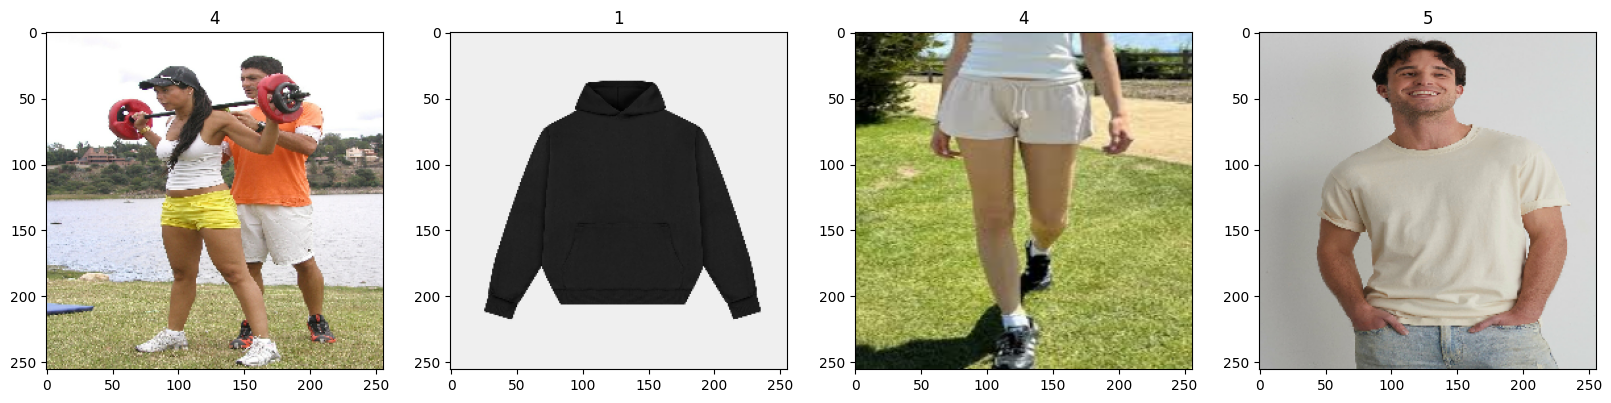

In [113]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# Print four images from the batch

In [114]:
data = data.map(lambda x,y: (x/255, y))

# .map applies formatting to all images in pipeline, performs transformation on x variable (division)
# x represents images
# y represents target variables (classes)

In [115]:
data.as_numpy_iterator().next()[0]

# IF values look off (i.e not in range [0,1]), you probably ran the division function twice
# Reload the data, grab another batch, plot, normalize, then run this code again

array([[[[0.28235295, 0.3882353 , 0.49411765],
         [0.28235295, 0.3882353 , 0.49411765],
         [0.2823947 , 0.38827705, 0.4941594 ],
         ...,
         [0.29142576, 0.40122968, 0.48750418],
         [0.29034162, 0.40014553, 0.48642004],
         [0.29034162, 0.40014553, 0.48642004]],

        [[0.28278953, 0.38910845, 0.49368107],
         [0.28278953, 0.38910845, 0.49368107],
         [0.28391543, 0.39023438, 0.49480698],
         ...,
         [0.29455423, 0.40435815, 0.49063265],
         [0.29455423, 0.40435815, 0.49063265],
         [0.29455423, 0.40435815, 0.49063265]],

        [[0.28700215, 0.39680606, 0.4909237 ],
         [0.28741857, 0.3972225 , 0.49134013],
         [0.28864682, 0.39845073, 0.49256837],
         ...,
         [0.29897574, 0.40877968, 0.4950542 ],
         [0.29876685, 0.40857077, 0.49484527],
         [0.29876685, 0.40857077, 0.49484527]],

        ...,

        [[0.32637867, 0.28962928, 0.2707491 ],
         [0.3241345 , 0.2873851 , 0.2685049 ]

In [116]:
print(len(data))

27


In [117]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1)

In [118]:
train_size + val_size + test_size

# train = 52 batches * 32 images / batch = 1664 images
# val = 16 batches * 32 images / batch = 512 images
# test = 7 batches * 32 images / batch = 224 images

26

In [119]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# .take allocates the batch size into respective set
# .take skips the previous and takes the remaining batches of the partition

TRAINING

In [120]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [121]:
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# 1 denotes stride size for Convolution
# Default maxpooling is a (2,2) grid size

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

In [122]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665,158 (25.43 MB)

 Trainable params: 6,665,158 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [124]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665,158 (25.43 MB)

 Trainable params: 6,665,158 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

# Creates space to place log model training for future performance

In [126]:
history = model.fit(train, epochs = 15, validation_data = val, callbacks = [tensorboard_callback])

# Add steps_per_epoch and val_steps for fitting (i.e. how many iterations are needed for one epoch to be completed)

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 780ms/step - accuracy: 0.2009 - loss: 2.3729 - val_accuracy: 0.1927 - val_loss: 1.7804
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 760ms/step - accuracy: 0.1998 - loss: 1.7695 - val_accuracy: 0.3021 - val_loss: 1.6345
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 767ms/step - accuracy: 0.3698 - loss: 1.6237 - val_accuracy: 0.3490 - val_loss: 1.6540
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 771ms/step - accuracy: 0.4318 - loss: 1.4425 - val_accuracy: 0.5052 - val_loss: 1.3477
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 773ms/step - accuracy: 0.5801 - loss: 1.1308 - val_accuracy: 0.6042 - val_loss: 1.0645
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 749ms/step - accuracy: 0.7168 - loss: 0.8913 - val_accuracy: 0.7188 - val_loss: 0.8756
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 740ms/step - accuracy: 0.7520 - loss: 0.6924 - val_accuracy: 0.7135 - val_loss: 0.8772
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 754ms/step - accuracy: 0.8218 - loss: 0.5036 - val_accu

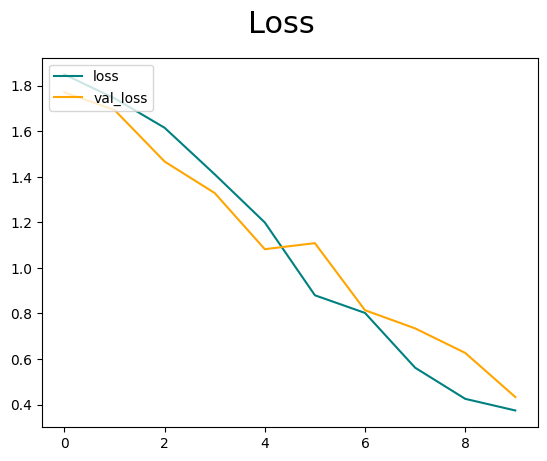

In [94]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 22)
plt.legend(loc = 'upper left')
plt.show()

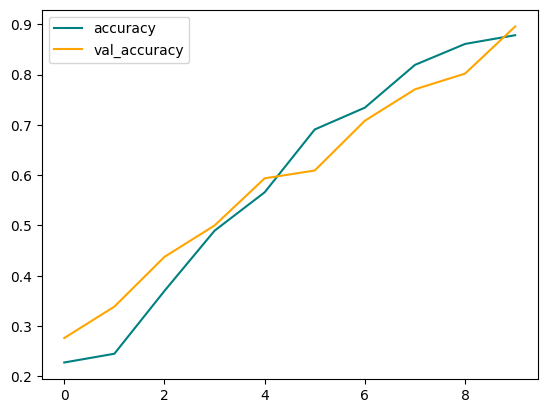

In [95]:
##### fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 22)
plt.legend(loc = 'upper left')
plt.show()